## **Calculate average results of TKAN and LSTM**

In [1]:
import os
import pandas as pd



In [ ]:
MODEL = 'TKAN' # change to 'LSTM ' or 'TKAN' as needed
dfs = []
folders = [folder for folder in os.listdir() if MODEL.lower() in folder.lower() and os.path.isdir(folder)]
folders

['TKAN10_1',
 'TKAN10_2',
 'TKAN10_3',
 'TKAN5_1',
 'TKAN5_2',
 'TKAN5_3',
 'TKAN5_4']

In [3]:
w =[int(folder.split('_')[0].strip(MODEL)) for folder in folders]
w

[10, 10, 10, 5, 5, 5, 5]

In [4]:
avg_cols = ['mae', 'mape', 'training_time']

for folder in folders:
    df = pd.read_csv(os.path.join(folder, f'{MODEL.lower()}_avg.csv'))
    dfs.append(df)

results_df = dfs[0].copy()

for col in avg_cols:
    weighted_columns = [df[col] * weight for df, weight in zip(dfs, w)]
    
    # Tổng trọng số
    total_weight = sum(w)
    
    # Tổng có trọng số
    weighted_sum = sum(weighted_columns)
    
    # Tính trung bình có trọng số
    results_df[col] = weighted_sum / total_weight

In [5]:
results_df.to_csv(f'{MODEL.lower()}_avg_{sum(w)}.csv', index=False)

## **Comparision**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(tkan_df, lstm_df, metric='mae'):
    """
    Plot a bar chart comparing TKAN and LSTM models based on the specified metric.

    Parameters:
    tkan_df (pd.DataFrame): DataFrame containing TKAN results
    lstm_df (pd.DataFrame): DataFrame containing LSTM results
    metric (str): Metric to plot on y-axis ('mae' or 'mpae')
    """
    # Gộp lại thành một DataFrame
    combined_df = pd.concat([tkan_df, lstm_df], ignore_index=True)

    # Lấy danh sách dataset và mô hình
    datasets = combined_df['dataset'].unique()
    models = ['TKAN', 'LSTM']

    # Thiết lập vị trí x
    spacing = 1.5
    x = np.arange(len(datasets)) * spacing  # Vị trí từng nhóm
    bar_width = 0.35  # Độ rộng cột

    # Lấy giá trị cho metric được chỉ định
    metric_tkan = combined_df[combined_df['model'] == 'TKAN'].set_index('dataset').loc[datasets][metric].values
    metric_lstm = combined_df[combined_df['model'] == 'LSTM'].set_index('dataset').loc[datasets][metric].values

    # Khởi tạo biểu đồ
    fig, ax = plt.subplots(figsize=(16, 6))

    # Vẽ từng cột
    bar1 = ax.bar(x - bar_width/2, metric_tkan, width=bar_width, label='TKAN', color='tab:blue')
    bar2 = ax.bar(x + bar_width/2, metric_lstm, width=bar_width, label='LSTM', color='tab:orange')

    # Gán nhãn trên đỉnh cột
    annotate_x_spacing = 0.15
    for bar in bar1:  # TKAN - màu xanh
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(-annotate_x_spacing, 3),  # lệch sang trái
                    textcoords="offset points",
                    ha='right', va='bottom', fontsize=8)

    for bar in bar2:  # LSTM - màu cam
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(+annotate_x_spacing, 3),  # lệch sang phải
                    textcoords="offset points",
                    ha='left', va='bottom', fontsize=8)

    # Thiết lập trục và nhãn
    ax.set_ylabel(metric.upper())
    ax.set_title(f'So sánh {metric.upper()} của TKAN và LSTM theo từng bộ dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets, rotation=45, ha='right', fontsize=8)
    ax.legend(title='Model', loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{metric.upper()}")
    plt.show()


In [7]:
import pandas as pd


def sort_cols(dataframe):
    df = dataframe.copy()
    # Tách trường
    df[['ws', 'fh', 'var']] = df['dataset'].str.extract(r'ws(\d+)_fh(\d+)_var(\d+)').astype(int)

    # Sắp xếp theo ws, fh, var
    df = df.sort_values(by=['ws', 'fh', 'var']).reset_index(drop=True)

    # (Tùy chọn) Nếu không cần 3 cột phụ, có thể xóa đi:
    # df = df.drop(columns=['ws', 'fh', 'var'])
    return df


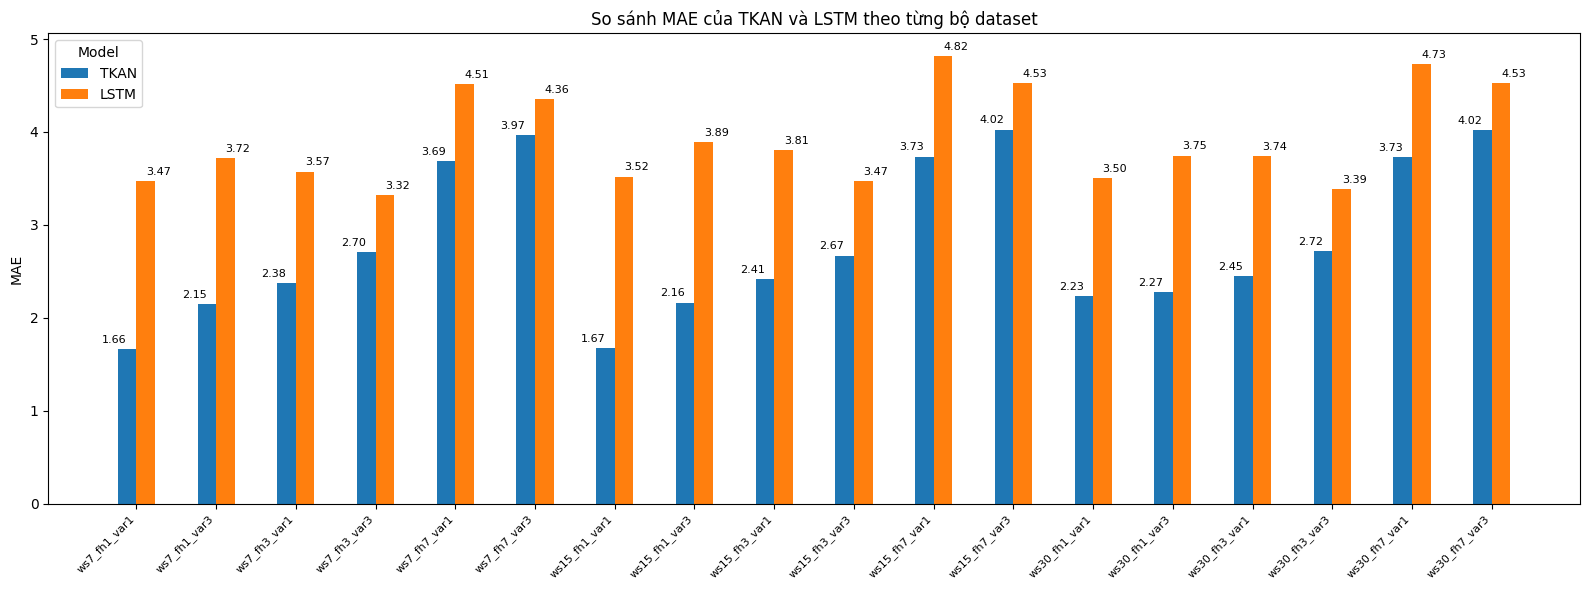

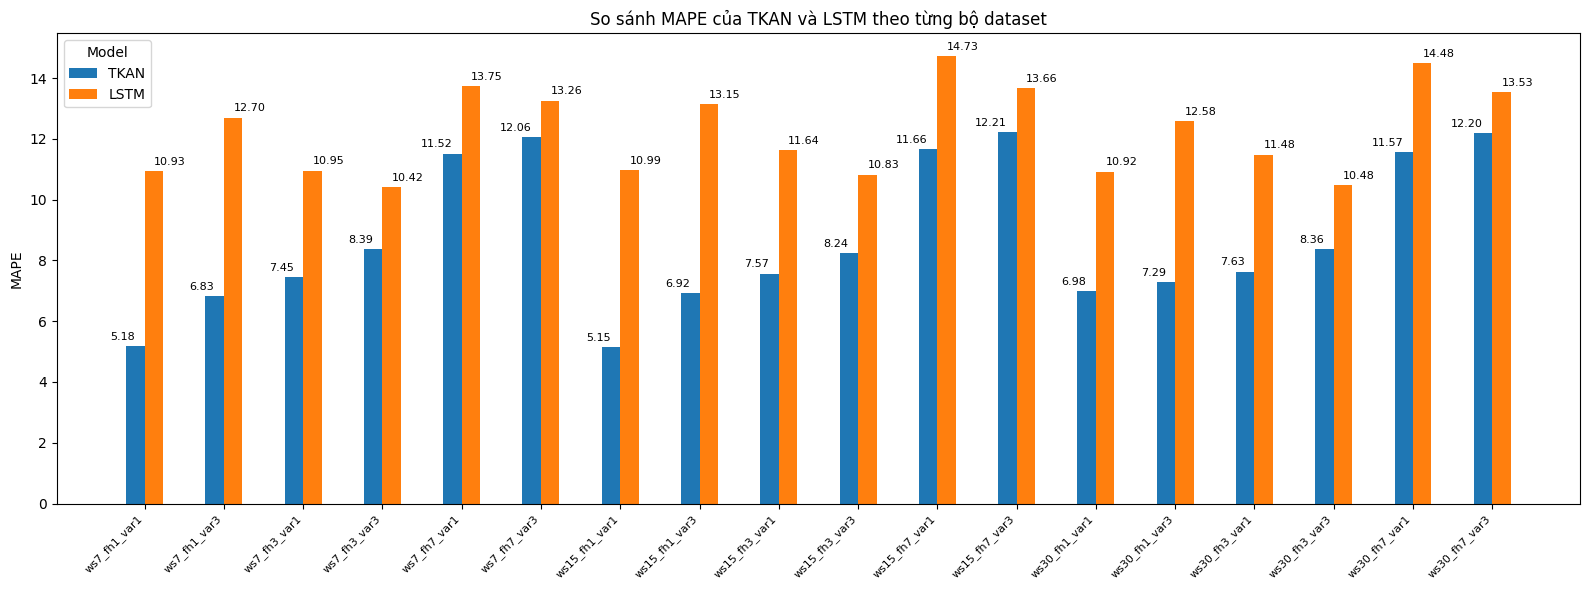

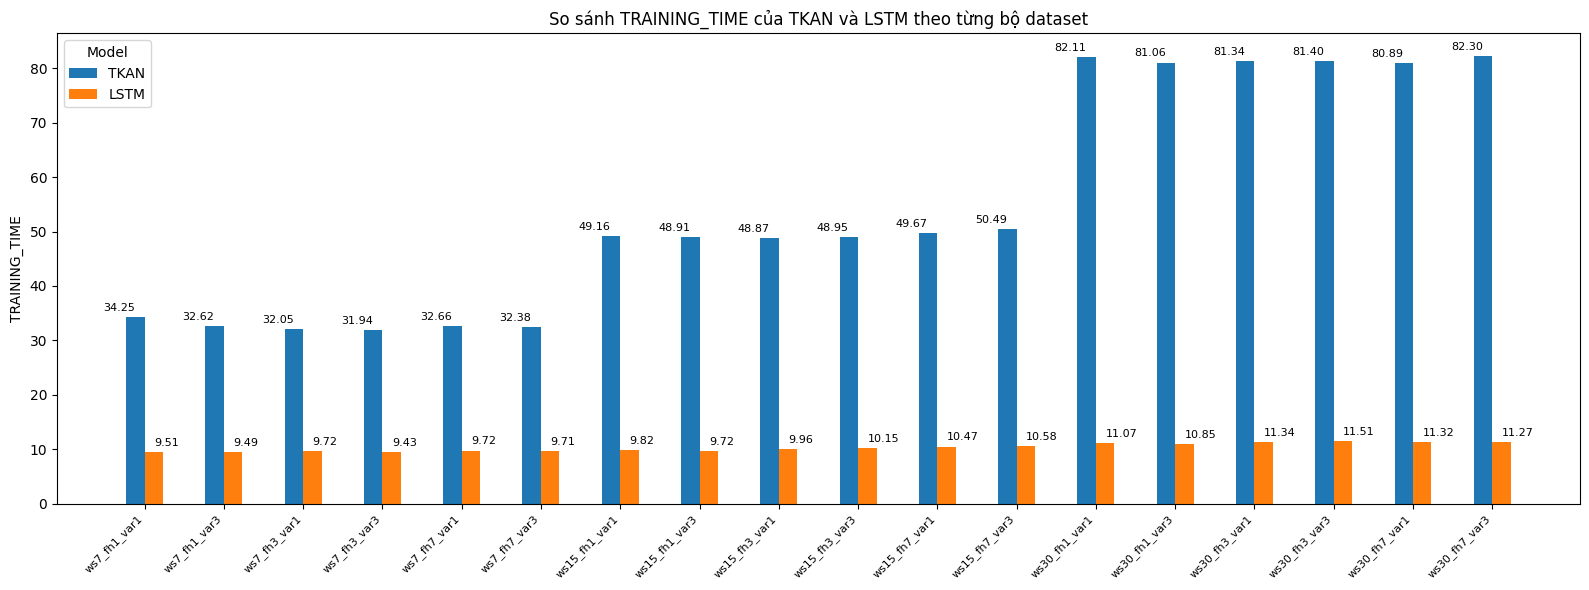

In [8]:
# read data
# tkan_df = pd.read_excel('tkan_results.xlsx')
tkan_df = pd.read_csv('tkan_avg_50.csv')
lstm_df = pd.read_csv('lstm_avg_50.csv')
if 'model' not in tkan_df.columns:
    tkan_df['model'] = "TKAN"

tkan_df = tkan_df.sort_values(by=['ws', 'n_ahead', 'n_var']).reset_index(drop=True)
lstm_df = lstm_df.sort_values(by=['ws', 'n_ahead', 'n_var']).reset_index(drop=True) 

# Vẽ biểu đồ cho MAE
plot_comparison(tkan_df, lstm_df, metric='mae')

# Vẽ biểu đồ cho MPAE
plot_comparison(tkan_df, lstm_df, metric='mape')

#time plot
plot_comparison(tkan_df, lstm_df, metric='training_time')

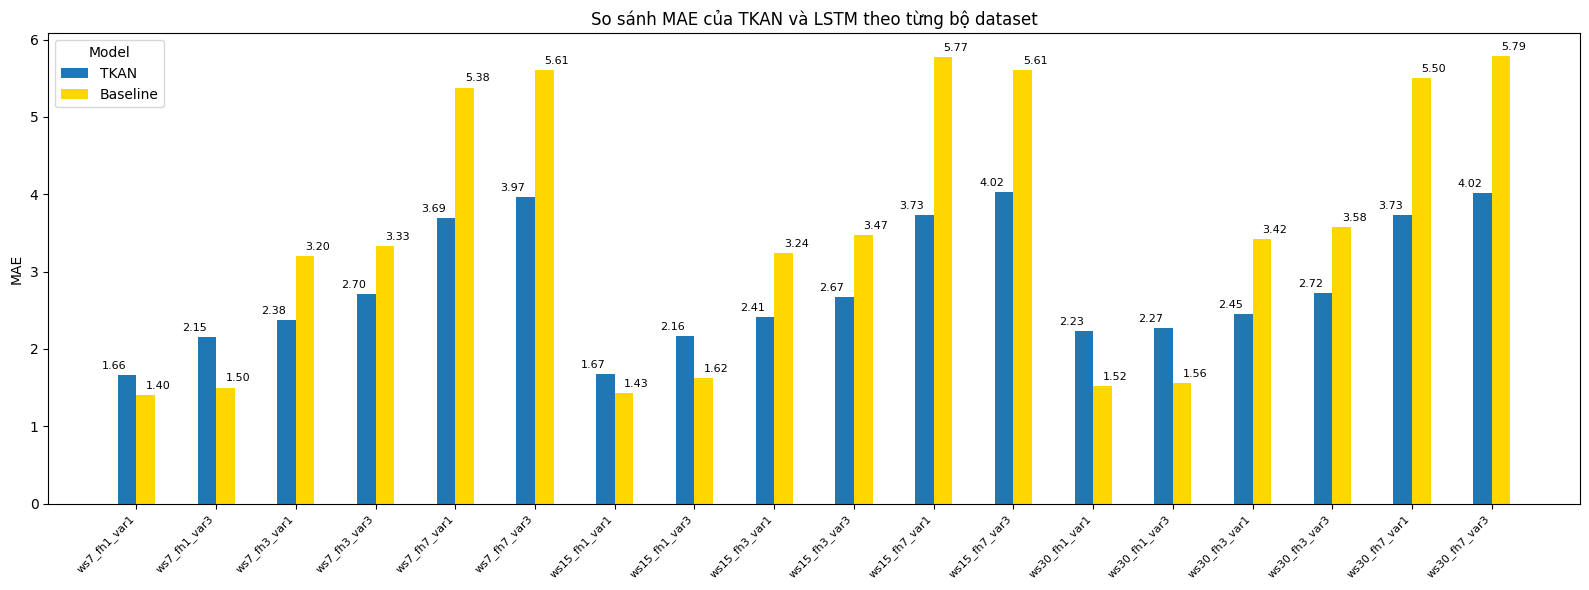

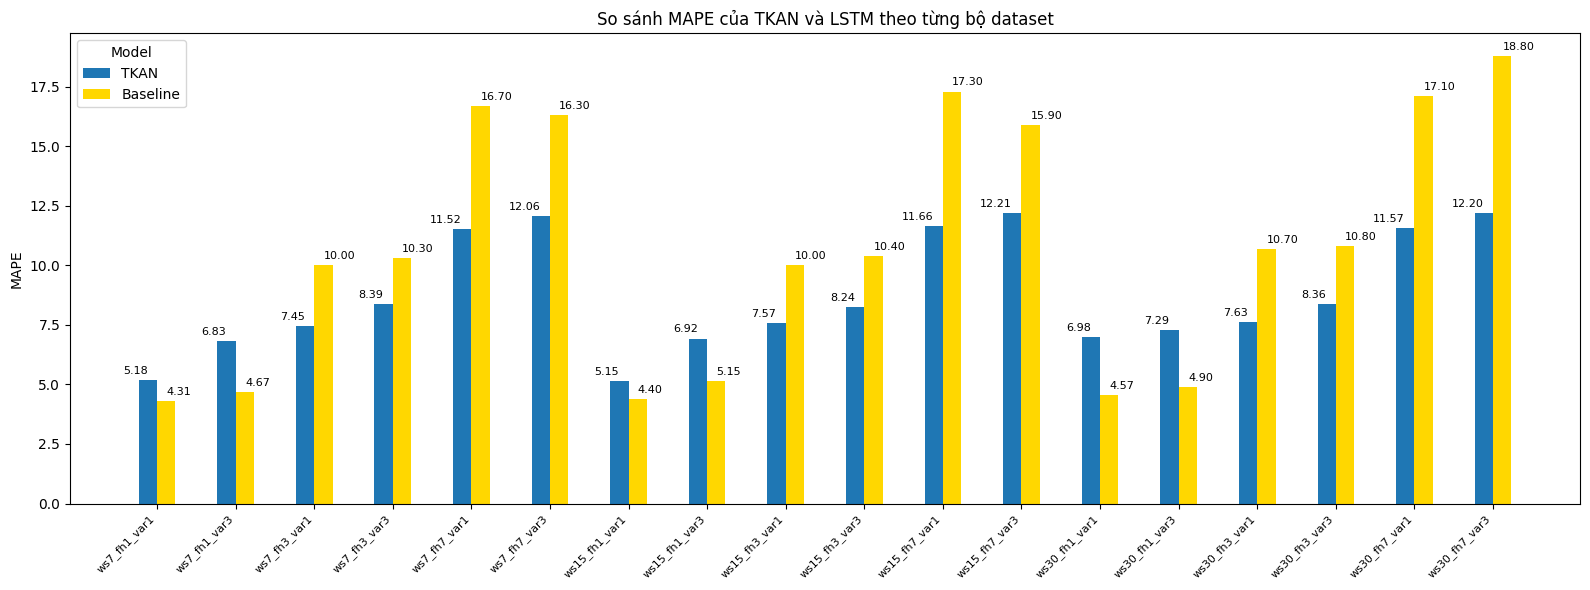

In [12]:
# baseline vs TKAN
def plot_comparison_bl(tkan_df, baseline_df, metric='mae'):
    # Gộp lại thành một DataFrame
    combined_df = pd.concat([tkan_df, baseline_df], ignore_index=True)

    # Lấy danh sách dataset và mô hình
    datasets = combined_df['dataset'].unique()
    models = ['TKAN', 'Baseline']

    # Thiết lập vị trí x
    spacing = 1.5
    x = np.arange(len(datasets)) * spacing  # Vị trí từng nhóm
    bar_width = 0.35  # Độ rộng cột

    # Lấy giá trị cho metric được chỉ định
    metric_tkan = combined_df[combined_df['model'] == 'TKAN'].set_index('dataset').loc[datasets][metric].values
    metric_lstm = combined_df[combined_df['model'] == 'Baseline'].set_index('dataset').loc[datasets][metric].values

    # Khởi tạo biểu đồ
    fig, ax = plt.subplots(figsize=(16, 6))

    # Vẽ từng cột
    bar1 = ax.bar(x - bar_width/2, metric_tkan, width=bar_width, label='TKAN', color='tab:blue')
    bar2 = ax.bar(x + bar_width/2, metric_lstm, width=bar_width, label='Baseline', color='gold')

    # Gán nhãn trên đỉnh cột
    annotate_x_spacing = 0.15
    for bar in bar1:  # TKAN - màu xanh
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(-annotate_x_spacing, 3),  # lệch sang trái
                    textcoords="offset points",
                    ha='right', va='bottom', fontsize=8)

    for bar in bar2:  # LSTM - màu cam
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(+annotate_x_spacing, 3),  # lệch sang phải
                    textcoords="offset points",
                    ha='left', va='bottom', fontsize=8)

    # Thiết lập trục và nhãn
    ax.set_ylabel(metric.upper())
    ax.set_title(f'So sánh {metric.upper()} của TKAN và LSTM theo từng bộ dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets, rotation=45, ha='right', fontsize=8)
    ax.legend(title='Model', loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{metric.upper()} - baseline")
    plt.show()


baseline = pd.read_csv('baseline_results.csv')
tkan_df = pd.read_csv('tkan_avg_50.csv')
if 'model' not in tkan_df.columns:
    tkan_df['model'] = "TKAN"
baseline = sort_cols(baseline)
tkan_df = sort_cols(tkan_df)

baseline['model'] = 'Baseline'

plot_comparison_bl(tkan_df, baseline, metric='mae')
plot_comparison_bl(tkan_df, baseline, metric='mape')